# Estadística Descriptiva de la Muestra

Este cuaderno documenta la estadística descriptiva de la cohorte del estudio RCP Transtelefónica. Se describen las variables principales mediante tablas y gráficos, siguiendo el lenguaje de diseño visual definido en el cuaderno 1.

## Objetivos del Análisis Descriptivo

- Describir las características basales de la muestra.
- Presentar la distribución de variables demográficas y clínicas relevantes.
- Generar tablas y gráficos descriptivos exportables para LaTeX.
- Aplicar el lenguaje de diseño visual definido en el cuaderno 1.

In [120]:
# Importar librerías y aplicar lenguaje de diseño visual
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Configuración visual (idéntica a cuaderno 1)
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 10,
    'axes.titlesize': 12,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.facecolor': 'white',
})

# Paleta cromática consistente (azules y coral)
COLORS = {
    'azul_principal': '#304C89',
    'azul_oscuro': '#2E282A',
    'azul_medio': '#58A4B0',
    'gris_claro': '#E4E6C3',
    'naranja': '#FA8334',
    'azul_claro': '#7FC7D9',
    'azul_pastel': '#B7D6E8',
    'gris_medio': '#B0B3A1',
    'negro': '#181A1B',
    'blanco': '#FFFFFF',
}


In [121]:
# Cargar datos limpios
DATA_PATH = "../data/3.cleaned_data/cleaned_data.csv"
df = pd.read_csv(DATA_PATH)
print(f"Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")
df.head()

Datos cargados: 497 filas, 14 columnas


,n_informe,fecha,edad,sexo,rcp_transtelefonica,rcp_testigos,respondiente_rcp,desa_externo,ritmo,tiempo_llegada_unidad,tiempo_rcp,rosc,supervivencia_7dias,cpc
0,71090,29/06/2023 18:15,89.0,Masculino,0,0,NaN,0,0,806,1470,1,0,5
1,73080,03/07/2023 14:07,58.0,Masculino,1,1,lego,0,1,442,1508,1,0,5
2,73309,04/07/2023 00:43,46.0,Masculino,0,0,NaN,0,0,319,0,0,0,5
3,73865,05/07/2023 13:18,45.0,Masculino,0,0,NaN,1,0,955,2534,1,0,5
4,74775,07/07/2023 17:26,59.0,Masculino,0,0,NaN,0,0,160,0,0,0,5


In [122]:
# Resumen de variables principales
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   n_informe              497 non-null    int64  
 1   fecha                  497 non-null    object 
 2   edad                   417 non-null    float64
 3   sexo                   474 non-null    object 
 4   rcp_transtelefonica    497 non-null    int64  
 5   rcp_testigos           497 non-null    int64  
 6   respondiente_rcp       176 non-null    object 
 7   desa_externo           497 non-null    int64  
 8   ritmo                  497 non-null    int64  
 9   tiempo_llegada_unidad  497 non-null    int64  
 10  tiempo_rcp             497 non-null    int64  
 11  rosc                   497 non-null    int64  
 12  supervivencia_7dias    497 non-null    int64  
 13  cpc                    497 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 54.5+ KB

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
n_informe,497.0,NaN,NaN,NaN,67050.857143,44392.954087,137.0,26150.0,62820.0,109043.0,144793.0
fecha,497,482,21/11/2023 09:38,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad,417.0,NaN,NaN,NaN,65.127098,17.267707,0.0,54.0,65.0,78.0,97.0
sexo,474,2,Masculino,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rcp_transtelefonica,497.0,NaN,NaN,NaN,0.1167,0.321386,0.0,0.0,0.0,0.0,1.0
rcp_testigos,497.0,NaN,NaN,NaN,0.354125,0.478729,0.0,0.0,0.0,1.0,1.0
respondiente_rcp,176,4,lego,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
desa_externo,497.0,NaN,NaN,NaN,0.108652,0.311516,0.0,0.0,0.0,0.0,1.0
ritmo,497.0,NaN,NaN,NaN,0.074447,0.262761,0.0,0.0,0.0,0.0,1.0
tiempo_llegada_unidad,497.0,NaN,NaN,NaN,467.219316,254.828291,4.0,305.0,428.0,579.0,2016.0


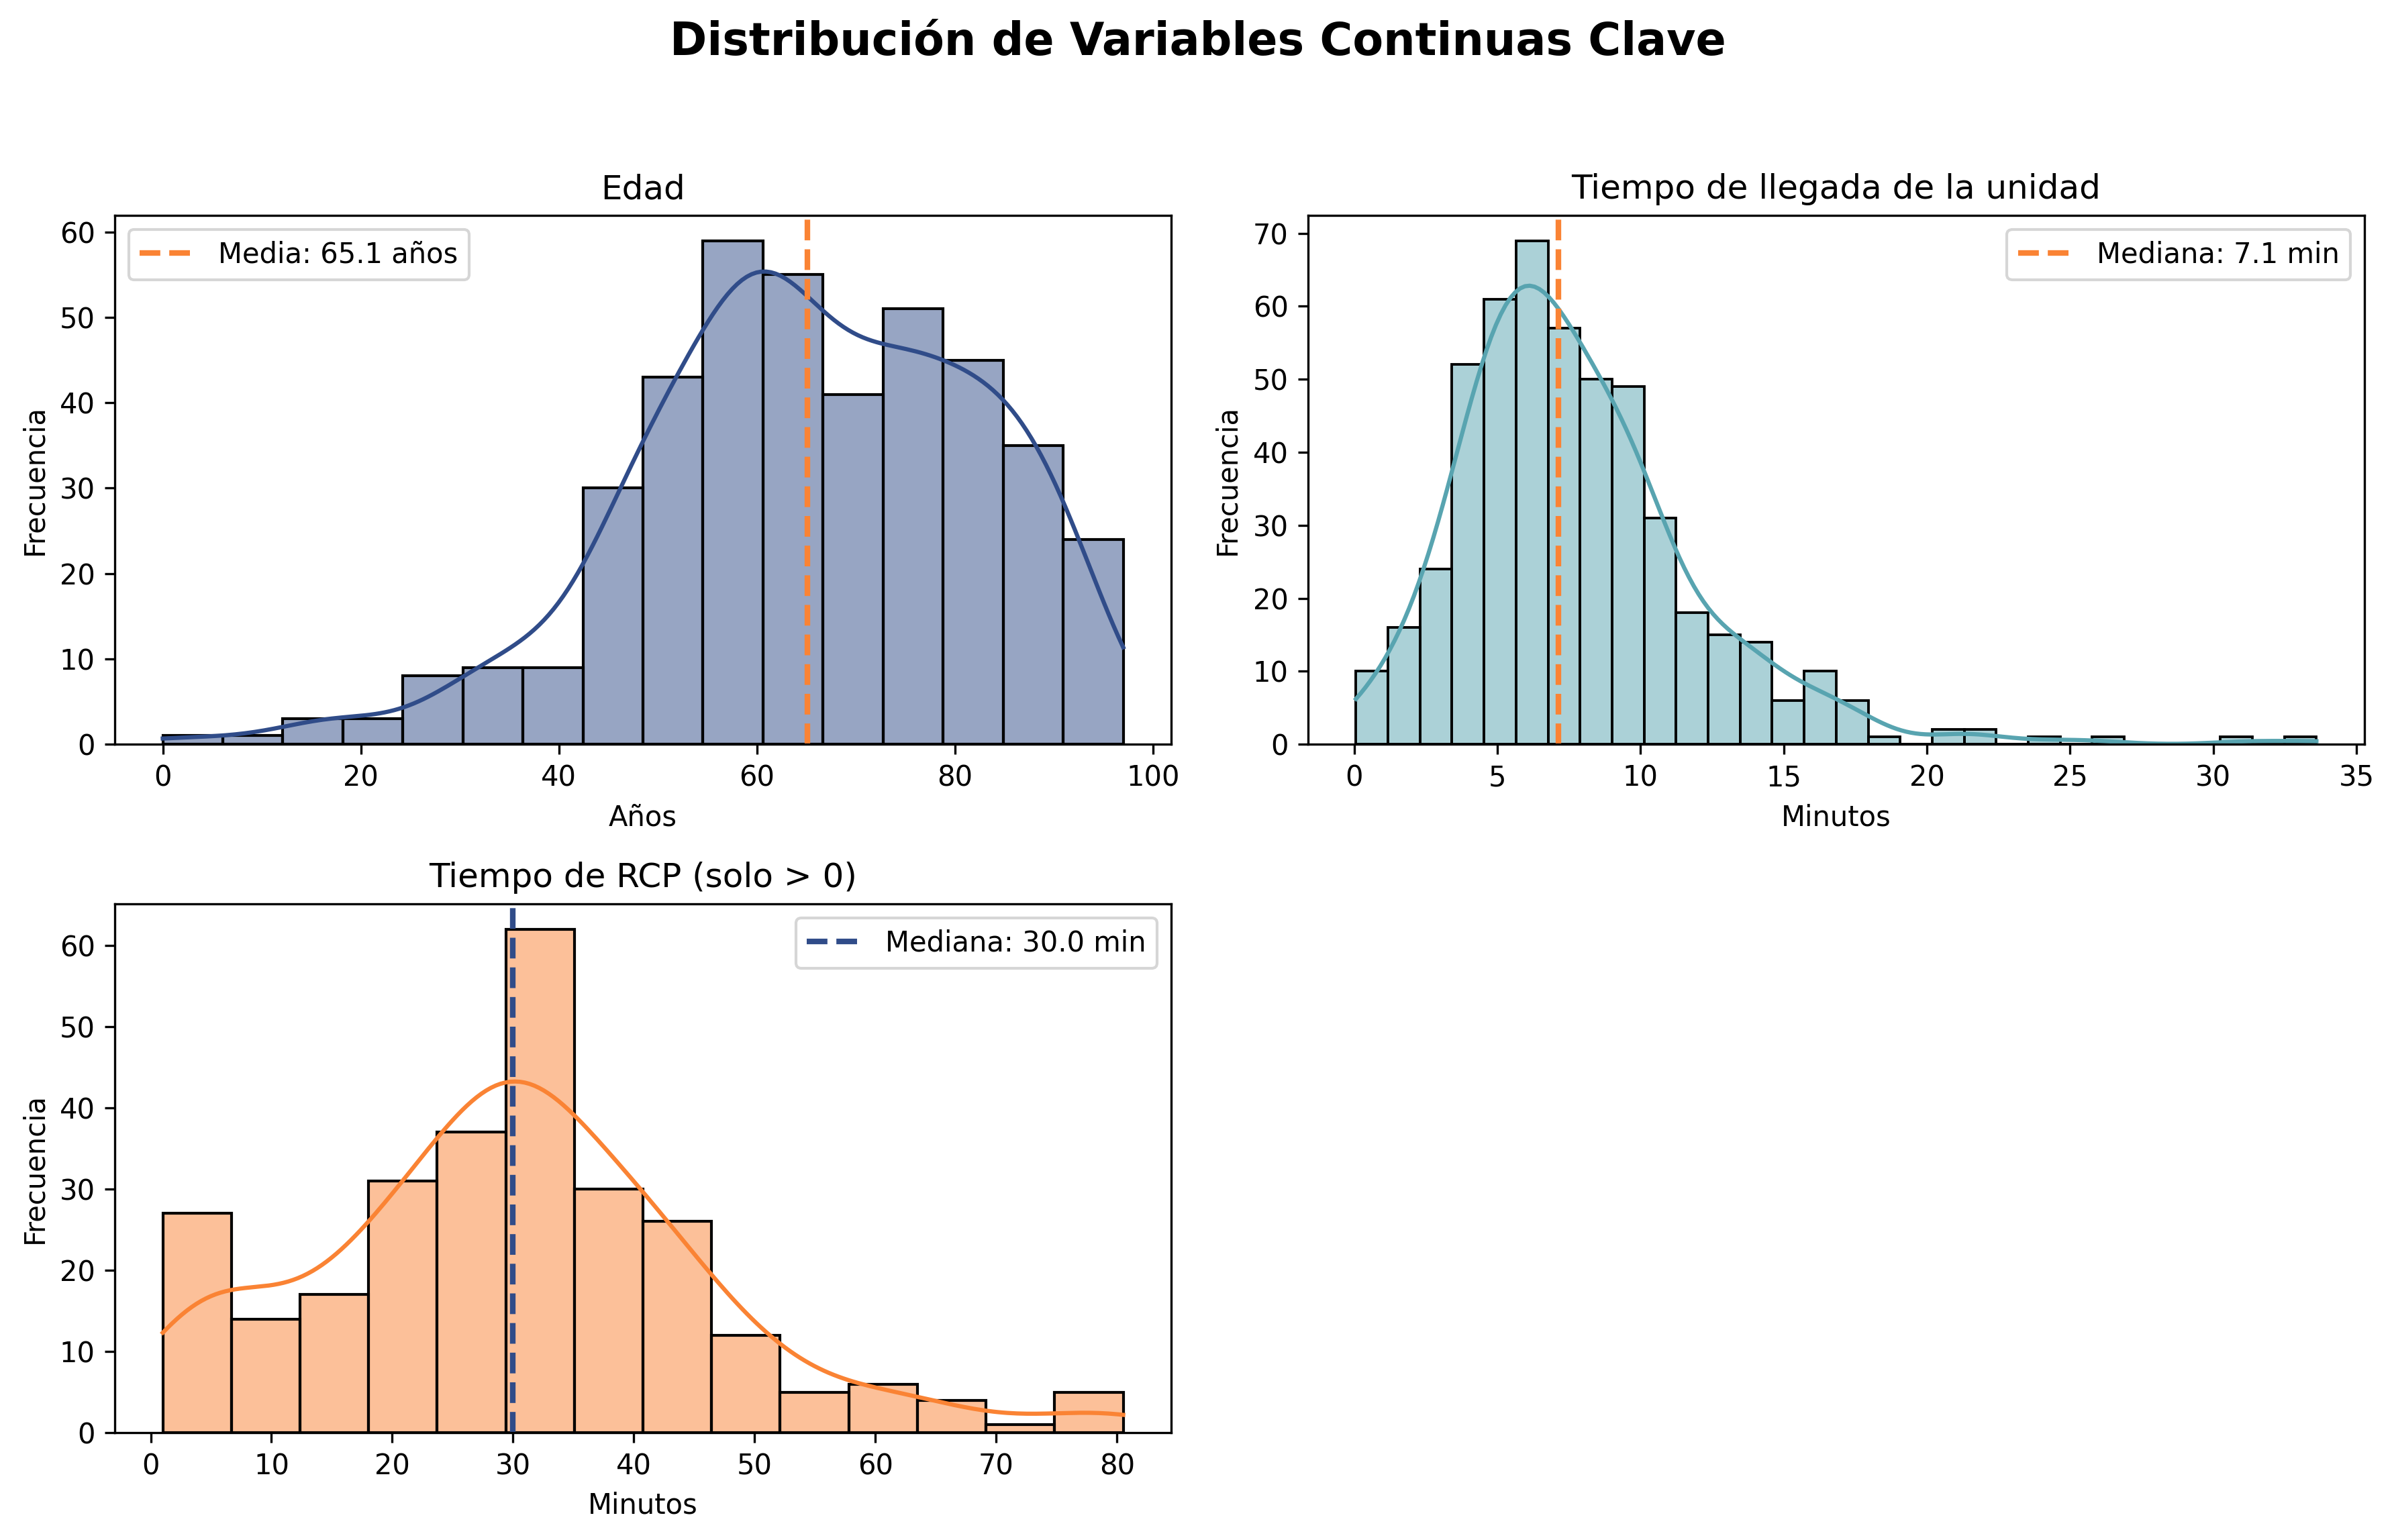

In [123]:
# Crear figura y ejes para los histogramas
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribución de Variables Continuas Clave', fontsize=16, weight='bold')

# --- 1. Histograma de Edad ---
# Preparar datos
edades = df['edad'].dropna()
media_edad = edades.mean()

# Graficar
sns.histplot(edades, ax=axes[0, 0], color=COLORS['azul_principal'], kde=True)
axes[0, 0].axvline(media_edad, color=COLORS['naranja'], linestyle='--', linewidth=2, label=f'Media: {media_edad:.1f} años')
axes[0, 0].set_title('Edad')
axes[0, 0].set_xlabel('Años')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].legend()

# --- 2. Histograma de Tiempo de Llegada ---
# Preparar datos (convertir segundos a minutos)
tiempo_llegada = df['tiempo_llegada_unidad'] / 60
mediana_llegada = tiempo_llegada.median()

# Graficar
sns.histplot(tiempo_llegada, ax=axes[0, 1], color=COLORS['azul_medio'], kde=True)
axes[0, 1].axvline(mediana_llegada, color=COLORS['naranja'], linestyle='--', linewidth=2, label=f'Mediana: {mediana_llegada:.1f} min')
axes[0, 1].set_title('Tiempo de llegada de la unidad')
axes[0, 1].set_xlabel('Minutos')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].legend()

# --- 3. Histograma de Tiempo de RCP ---
# Preparar datos (excluir ceros y convertir a minutos)
tiempo_rcp = df[df['tiempo_rcp'] > 0]['tiempo_rcp'] / 60
mediana_rcp = tiempo_rcp.median()

# Graficar
sns.histplot(tiempo_rcp, ax=axes[1, 0], color=COLORS['naranja'], kde=True)
axes[1, 0].axvline(mediana_rcp, color=COLORS['azul_principal'], linestyle='--', linewidth=2, label=f'Mediana: {mediana_rcp:.1f} min')
axes[1, 0].set_title('Tiempo de RCP (solo > 0)')
axes[1, 0].set_xlabel('Minutos')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].legend()

# Ocultar el eje no utilizado
axes[1, 1].set_visible(False)

# Ajustar y mostrar el gráfico
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

/var/folders/0x/jxq7wgnx59g2l390ddth7k840000gn/T/ipykernel_99101/3750170705.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(grupos_edad, labels=labels_edad, patch_artist=True,
/var/folders/0x/jxq7wgnx59g2l390ddth7k840000gn/T/ipykernel_99101/3750170705.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(grupos_tiempo, labels=labels_tiempo, patch_artist=True,
/var/folders/0x/jxq7wgnx59g2l390ddth7k840000gn/T/ipykernel_99101/3750170705.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

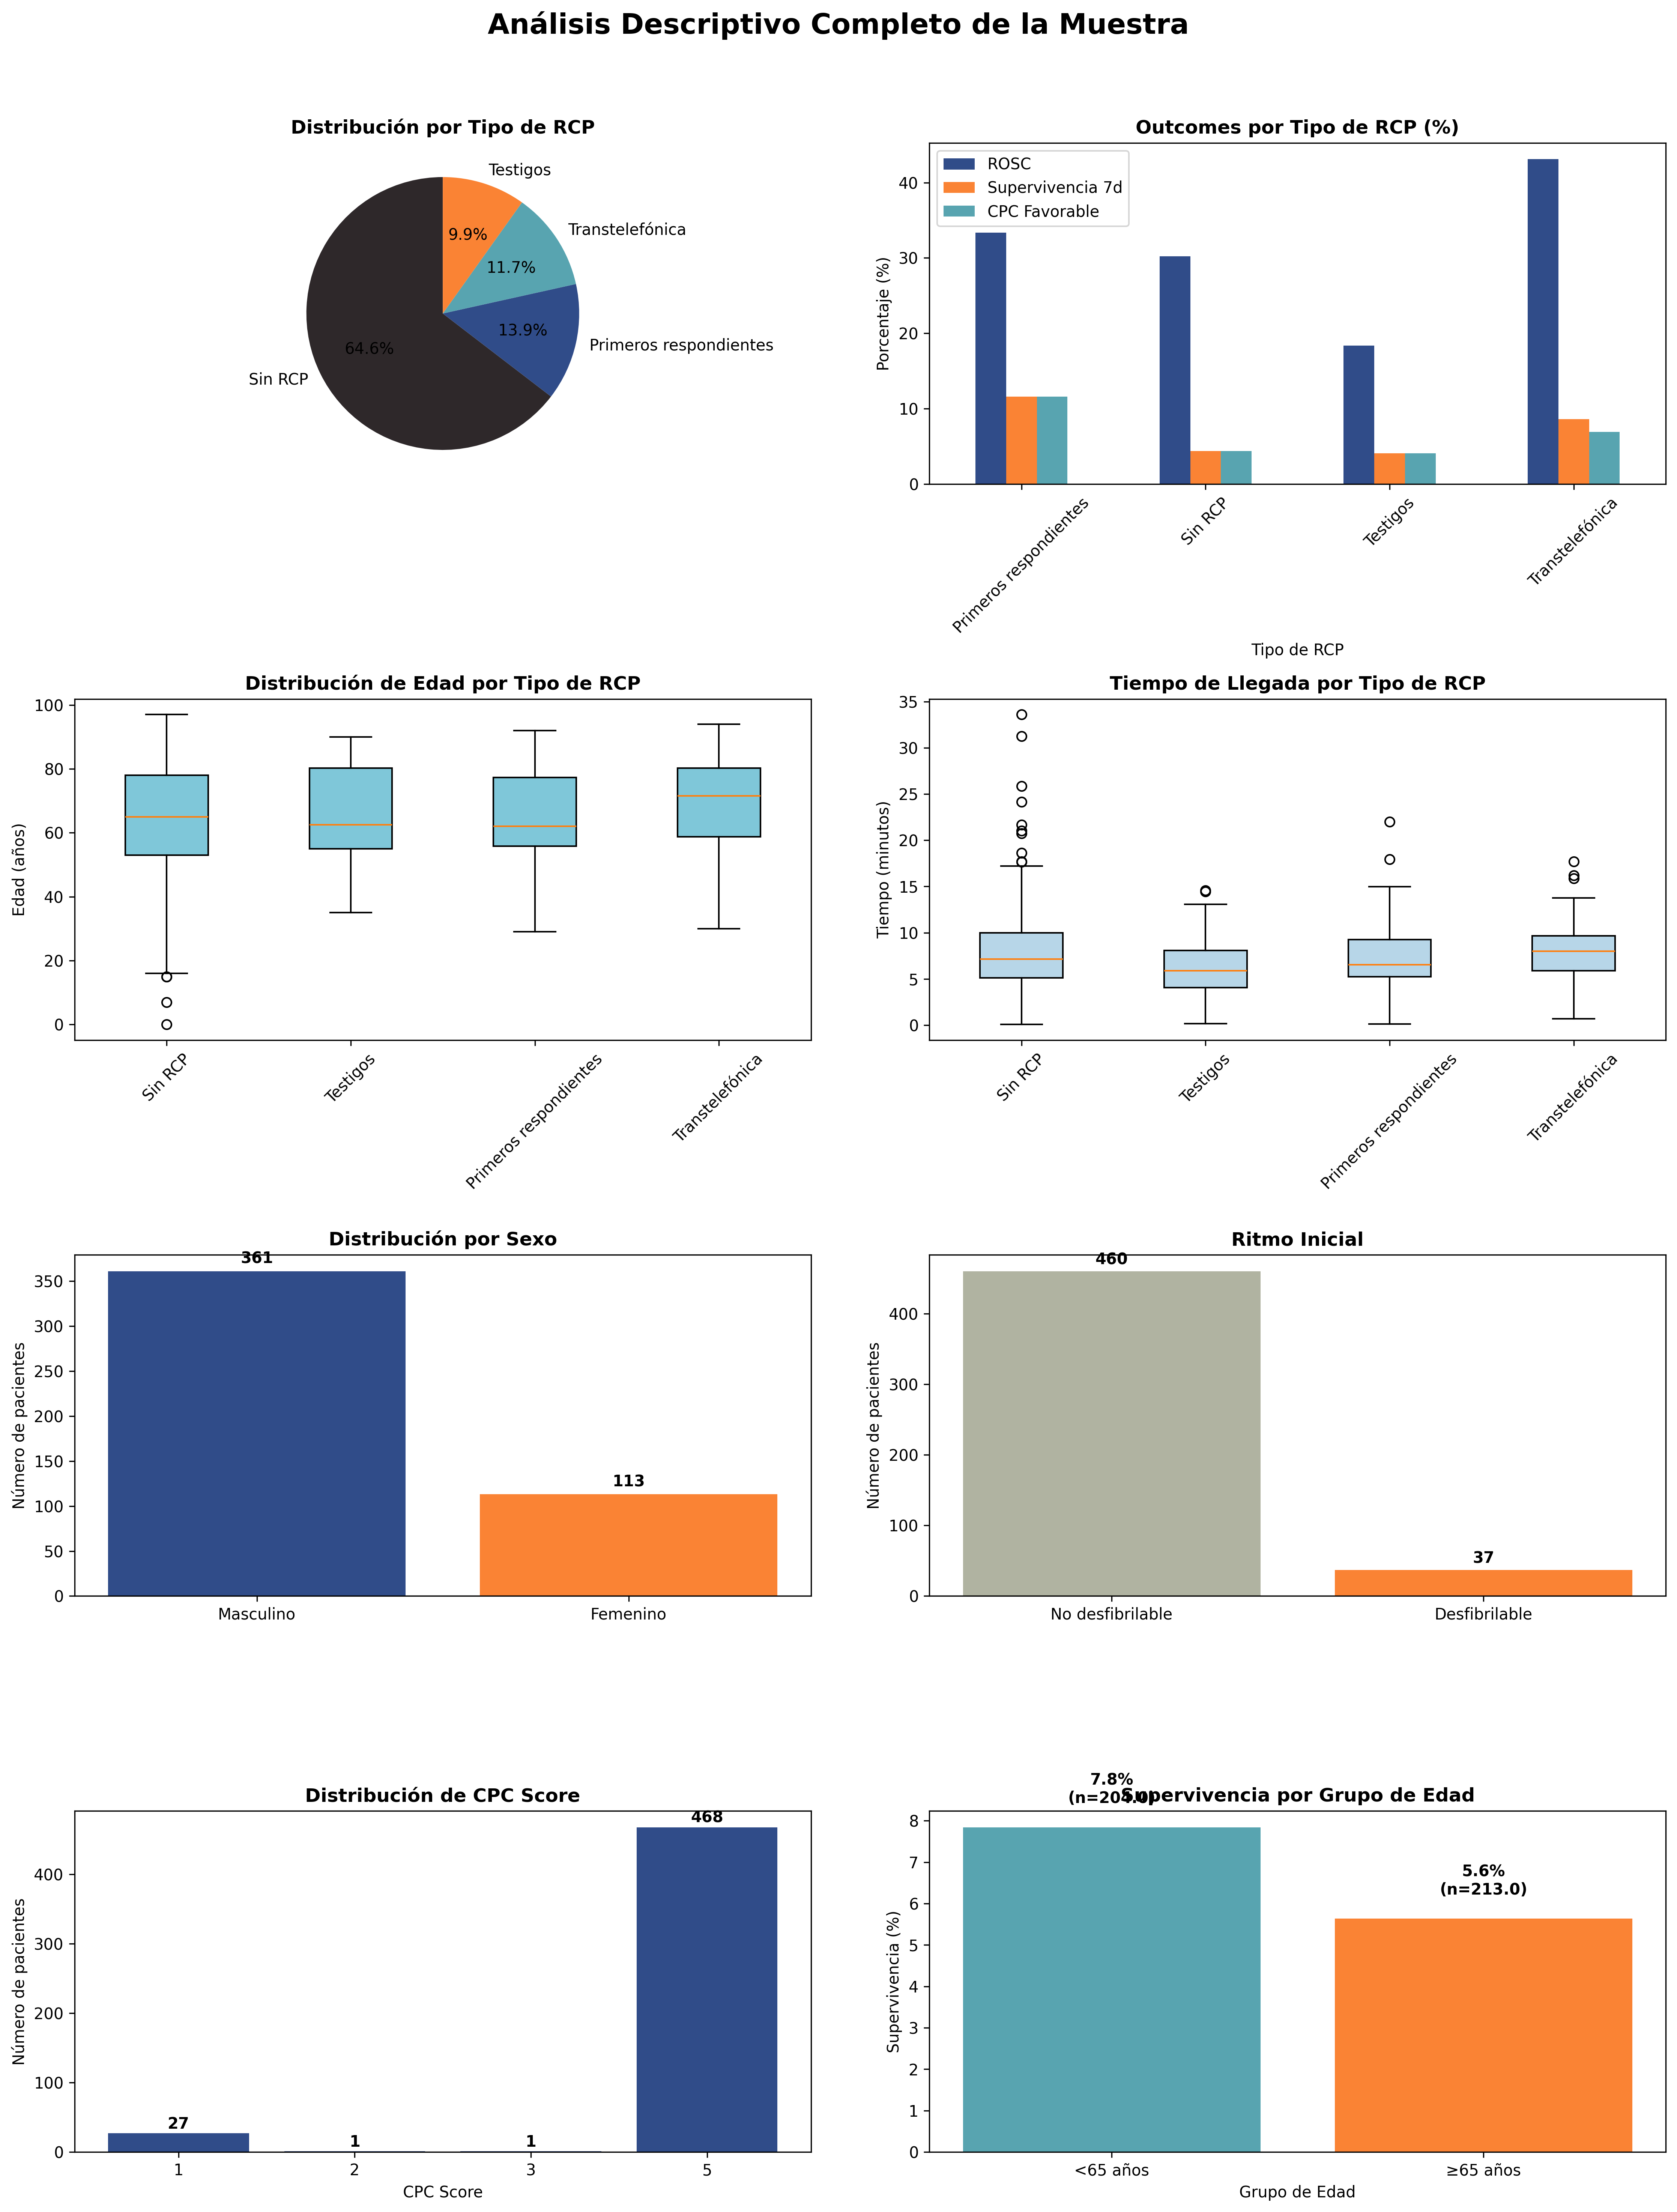


=== ESTADÍSTICAS DESCRIPTIVAS CLAVE ===
N total: 497
Edad media: 65.1 ± 17.3 años
Mediana edad: 65.0 años
Tiempo llegada mediano: 7.1 minutos
ROSC global: 154 (31.0%)
Supervivencia global: 29 (5.8%)
CPC favorable global: 28 (5.6%)


In [133]:
# Crear un grid de 4x2 con 8 gráficas descriptivas
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Análisis Descriptivo Completo de la Muestra', fontsize=18, weight='bold', y=0.98)

# --- 1. Distribución por Tipo de RCP (Pie Chart) ---
sizes = grupo_counts.values
labels = grupo_counts.index
colors_rcp = [COLORS['azul_oscuro'], COLORS['azul_principal'], COLORS['azul_medio'], COLORS['naranja']]

wedges, texts, autotexts = axes[0, 0].pie(sizes, labels=labels, autopct='%1.1f%%', 
                                          colors=colors_rcp, startangle=90)
axes[0, 0].set_title('Distribución por Tipo de RCP', fontsize=12, weight='bold')

# --- 2. Outcomes Principales por Grupo de RCP ---
outcomes_by_group = df.groupby('grupo_rcp')[['rosc', 'supervivencia_7dias', 'cpc_favorable']].mean() * 100
outcomes_by_group.plot(kind='bar', ax=axes[0, 1], color=[COLORS['azul_principal'], COLORS['naranja'], COLORS['azul_medio']])
axes[0, 1].set_title('Outcomes por Tipo de RCP (%)', fontsize=12, weight='bold')
axes[0, 1].set_xlabel('Tipo de RCP')
axes[0, 1].set_ylabel('Porcentaje (%)')
axes[0, 1].legend(['ROSC', 'Supervivencia 7d', 'CPC Favorable'])
axes[0, 1].tick_params(axis='x', rotation=45)

# --- 3. Distribución de Edad por Grupos ---
grupos_edad = []
labels_edad = []
for grupo in orden:
    edades_grupo = df[df['grupo_rcp'] == grupo]['edad'].dropna()
    if len(edades_grupo) > 0:
        grupos_edad.append(edades_grupo)
        labels_edad.append(grupo)

axes[1, 0].boxplot(grupos_edad, labels=labels_edad, patch_artist=True,
                   boxprops=dict(facecolor=COLORS['azul_claro']))
axes[1, 0].set_title('Distribución de Edad por Tipo de RCP', fontsize=12, weight='bold')
axes[1, 0].set_ylabel('Edad (años)')
axes[1, 0].tick_params(axis='x', rotation=45)

# --- 4. Tiempo de Llegada por Grupo ---
grupos_tiempo = []
labels_tiempo = []
for grupo in orden:
    tiempo_grupo = df[df['grupo_rcp'] == grupo]['tiempo_llegada_unidad'] / 60
    if len(tiempo_grupo) > 0:
        grupos_tiempo.append(tiempo_grupo)
        labels_tiempo.append(grupo)

axes[1, 1].boxplot(grupos_tiempo, labels=labels_tiempo, patch_artist=True,
                   boxprops=dict(facecolor=COLORS['azul_pastel']))
axes[1, 1].set_title('Tiempo de Llegada por Tipo de RCP', fontsize=12, weight='bold')
axes[1, 1].set_ylabel('Tiempo (minutos)')
axes[1, 1].tick_params(axis='x', rotation=45)

# --- 5. Distribución por Sexo ---
sexo_counts = df['sexo'].value_counts()
axes[2, 0].bar(sexo_counts.index, sexo_counts.values, 
               color=[COLORS['azul_principal'], COLORS['naranja']])
axes[2, 0].set_title('Distribución por Sexo', fontsize=12, weight='bold')
axes[2, 0].set_ylabel('Número de pacientes')
for i, v in enumerate(sexo_counts.values):
    axes[2, 0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# --- 6. Ritmo Inicial Desfibrilable ---
ritmo_counts = df['ritmo'].value_counts()
ritmo_labels = ['No desfibrilable', 'Desfibrilable']
axes[2, 1].bar(ritmo_labels, ritmo_counts.values, 
               color=[COLORS['gris_medio'], COLORS['naranja']])
axes[2, 1].set_title('Ritmo Inicial', fontsize=12, weight='bold')
axes[2, 1].set_ylabel('Número de pacientes')
for i, v in enumerate(ritmo_counts.values):
    axes[2, 1].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# --- 7. CPC Score Detallado ---
cpc_counts = df['cpc'].value_counts().sort_index()
axes[3, 0].bar(range(len(cpc_counts)), cpc_counts.values, 
               color=COLORS['azul_principal'])
axes[3, 0].set_title('Distribución de CPC Score', fontsize=12, weight='bold')
axes[3, 0].set_xlabel('CPC Score')
axes[3, 0].set_ylabel('Número de pacientes')
axes[3, 0].set_xticks(range(len(cpc_counts)))
axes[3, 0].set_xticklabels(cpc_counts.index)
for i, v in enumerate(cpc_counts.values):
    axes[3, 0].text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

# --- 8. Supervivencia por Estratos de Edad ---
df_edad_clean = df.dropna(subset=['edad'])
df_edad_clean['grupo_edad'] = df_edad_clean['edad'].apply(lambda x: '<65 años' if x < 65 else '≥65 años')
supervivencia_edad = df_edad_clean.groupby('grupo_edad')['supervivencia_7dias'].agg(['mean', 'count'])
supervivencia_edad['porcentaje'] = supervivencia_edad['mean'] * 100

bars = axes[3, 1].bar(supervivencia_edad.index, supervivencia_edad['porcentaje'], 
                      color=[COLORS['azul_medio'], COLORS['naranja']])
axes[3, 1].set_title('Supervivencia por Grupo de Edad', fontsize=12, weight='bold')
axes[3, 1].set_ylabel('Supervivencia (%)')
axes[3, 1].set_xlabel('Grupo de Edad')

# Añadir etiquetas con n y porcentaje
for i, (idx, row) in enumerate(supervivencia_edad.iterrows()):
    axes[3, 1].text(i, row['porcentaje'] + 0.5, 
                    f'{row["porcentaje"]:.1f}%\n(n={row["count"]})', 
                    ha='center', va='bottom', fontweight='bold')

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Imprimir estadísticas descriptivas clave
print("\n=== ESTADÍSTICAS DESCRIPTIVAS CLAVE ===")
print(f"N total: {len(df)}")
print(f"Edad media: {df['edad'].mean():.1f} ± {df['edad'].std():.1f} años")
print(f"Mediana edad: {df['edad'].median():.1f} años")
print(f"Tiempo llegada mediano: {(df['tiempo_llegada_unidad']/60).median():.1f} minutos")
print(f"ROSC global: {df['rosc'].sum()} ({df['rosc'].mean()*100:.1f}%)")
print(f"Supervivencia global: {df['supervivencia_7dias'].sum()} ({df['supervivencia_7dias'].mean()*100:.1f}%)")
print(f"CPC favorable global: {df['cpc_favorable'].sum()} ({df['cpc_favorable'].mean()*100:.1f}%)")

# Guardamos en pdf